In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import PercentFormatter
from scipy.stats import uniform, triang
from cpm import getPCritical, getCDF

## Problem 1:

In [2]:
homework3 = [
    {
        "id": "A",
        "min_duration": 5,
        "ml_duration": None,
        "max_duration": 7,
        "predecessor": [],
    },
    {
        "id": "B",
        "min_duration": 4,
        "ml_duration": None,
        "max_duration": 7,
        "predecessor": ["A"],
    },
    {
        "id": "C",
        "min_duration": 6,
        "ml_duration": 8,
        "max_duration": 9,
        "predecessor": ["A"],
    },
    {
        "id": "D",
        "min_duration": 2,
        "ml_duration": None,
        "max_duration": 3,
        "predecessor": ["B", "C"],
    },
    {
        "id": "E",
        "min_duration": 4,
        "ml_duration": 5,
        "max_duration": 6,
        "predecessor": ["D"],
    },
    {
        "id": "F",
        "min_duration": 1,
        "ml_duration": None,
        "max_duration": 1,
        "predecessor": ["E"],
    }
]
PCritical, activityIDs = getPCritical(homework3)
dataset = getCDF(homework3)

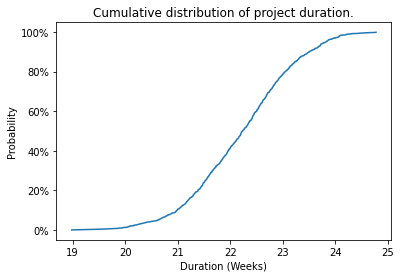

In [3]:
arr_durations = np.array([data["x"] for data in dataset])
arr_percentages = np.array([data["y"] for data in dataset])

ax = plt.plot(arr_durations, arr_percentages)
plt.title("Cumulative distribution of project duration.")
plt.xlabel("Duration (Weeks)")
plt.ylabel("Probability")

# set y-axis ticks as percent values, with 1 being 100%
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

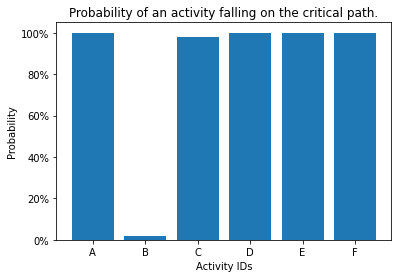

In [4]:
plt.bar(activityIDs, PCritical)
plt.title("Probability of an activity falling on the critical path.")
plt.xlabel("Activity IDs")
plt.ylabel("Probability")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## Problem 2:

## Set-Up

In [5]:
# quantity of units for the new highway milling project
qnew = (((2 * 9) + (4 * 12)) * (3 * 5280)) / 9
qnew

116160.0

In [6]:
df = pd.read_csv("./CIVL-300-3-2.csv")

In [7]:
df

,Item_Description,Unit,Quantity,Unit Cost,Total Cost
0,MILL ASPHALT CONCRETE PAVEMENT IN DEPTH 105744,S.Y.,38125.000,1.00000,38125
1,MILL ASPHALT CONCRETE PAVEMENT IN DEPTH 105759,S.Y.,19923.000,1.37000,27295
2,MILL ASPHALT CONCRETE PAVEMENT IN DEPTH 105836,S.Y.,22518.000,0.92000,20717
3,MILL ASPHALT CONCRETE PAVEMENT IN DEPTH 105868,S.Y.,6300.000,2.62000,16506
4,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,68781.388,1.88965,129973
...,...,...,...,...,...
525,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,178520.000,1.04000,185661
526,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,159800.000,0.94000,150212
527,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,109300.000,1.30000,142090
528,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,6700.000,2.55000,17085


## Question A:

Since TC = FC + Average Cost of Production * q. If we draw a line of best fit we should see a y-intercept referring to the best fit Fixed Cost value, which is 0

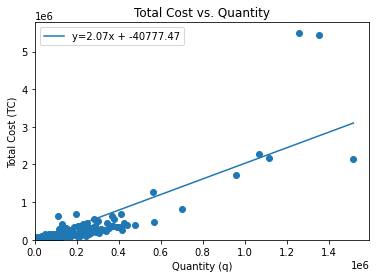

In [8]:
slope, intercept = np.polyfit(df["Quantity"], df["Total Cost"], 1)
plt.scatter(df["Quantity"], df["Total Cost"])
xvals = np.linspace(0, df["Quantity"].max(), 1000)
plt.plot(xvals, slope*xvals + intercept, label=f"y={round(slope, 2)}x + {round(intercept, 2)}")

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("Total Cost vs. Quantity")
plt.xlabel("Quantity (q)")
plt.ylabel("Total Cost (TC)")
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig(f"TCversusq.png")

## Question B:

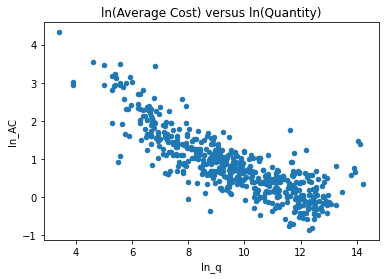

In [9]:
df["ln_AC"] = df["Unit Cost"].apply(lambda x: math.log(x))
df["ln_q"] = df["Quantity"].apply(lambda x: math.log(x))
df.plot.scatter(x="ln_q", y="ln_AC")
fig = plt.gcf()
plt.title("ln(Average Cost) versus ln(Quantity)")
plt.show()
# fig.savefig(f"lnACversuslnq.png")

In [10]:
# reshape so that ln_q has 1 column and an inferred number of rows (-1)
lnq = df["ln_q"].to_numpy().reshape((-1, 1))

In [11]:
linear_reg1 = LinearRegression().fit(lnq, df["ln_AC"])

In [12]:
linear_reg1.intercept_ # ln(c)

3.9510869914521853

In [13]:
mprime = linear_reg1.coef_[0] # m' = m - 1
mprime

-0.324649736366176

In [14]:
m = mprime + 1 # m
m

0.675350263633824

In [15]:
alpha = 1/m # alpha = 1/m
alpha

1.4807131259849506

#### Summary:
* alpha > 1, therefore increasing returns to scale is present
* Downward trending linear relationship between log (average cost) and log (quantity)
* Downward trend indicates increasing returns to scale (an increase in input causes a greater increase in output for higher inputs)
* Increasing returns to scale leads economies of scale (as output increase, the average cost to produce a unit of output decreases)

## Question C:

In [16]:
df["ln_TC"] = df["Total Cost"].apply(lambda x: math.log(x))

In [17]:
linear_reg2 = LinearRegression().fit(lnq, df["ln_TC"])
b2 = linear_reg2.intercept_ # ln(c)
b2 

3.951107708339456

In [18]:
m2 = linear_reg2.coef_[0] # m value, same as before
m2

0.6753485152666654

In [19]:
c2 = math.e**(b2) # c
c2

51.992927948364105

In [20]:
TC2 = c2 * qnew ** m2 # Total_Cost = c * q**m
TC2

136969.1409550474

In [21]:
avg_UnitCost = df["Unit Cost"].mean()
avg_UnitCost

3.7136534150943397

In [22]:
qnew * avg_UnitCost

431377.9806973585

In [23]:
df["Unit Cost"].describe()

count    530.000000
mean       3.713653
std        5.545760
min        0.420000
25%        1.322500
50%        2.065000
75%        3.697500
max       75.590000
Name: Unit Cost, dtype: float64

In [24]:
df["Unit Cost"].median()

2.065

In [25]:
qnew * df["Unit Cost"].median()

239870.4

In [26]:
qnew * df["Unit Cost"].median()/TC2

1.7512733038073467

<AxesSubplot:>

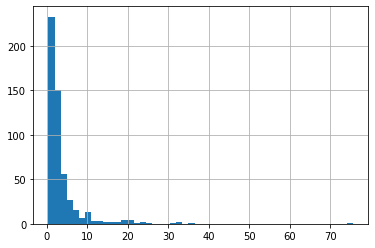

In [27]:
df["Unit Cost"].hist(bins=50)

In [28]:
df.loc[df["Unit Cost"].nlargest(10).index]

,Item_Description,Unit,Quantity,Unit Cost,Total Cost,ln_AC,ln_q,ln_TC
48,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,30.0,75.59,2268,4.325324,3.401197,7.726654
328,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,100.0,35.00,3500,3.555348,4.605170,8.160518
420,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,267.0,32.50,8678,3.481240,5.587249,9.068546
345,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,147.0,32.00,4704,3.465736,4.990433,8.456168
149,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,919.0,31.00,28489,3.433987,6.823286,10.257273
410,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,220.0,25.00,5500,3.218876,5.393628,8.612503
130,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,200.0,24.05,4810,3.180135,5.298317,8.478452
352,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,370.0,23.15,8566,3.141995,5.913503,9.055556
515,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,225.0,22.65,5096,3.120160,5.416100,8.536211
409,MILL ASPHALT CONCRETE PAVEMENT VARIABLE DEPT 1...,S.Y.,400.0,20.75,8300,3.032546,5.991465,9.024011


In [29]:
df.loc[df["Quantity"] >= 80000]["Unit Cost"].mean()

1.2634090909090907

In [30]:
# price generated from mean Unit Cost from observations with a quantity greater 80 000 yd^2
df.loc[df["Quantity"] >= 80000]["Unit Cost"].mean() * qnew

146757.59999999998